# **How SQL API Works?**

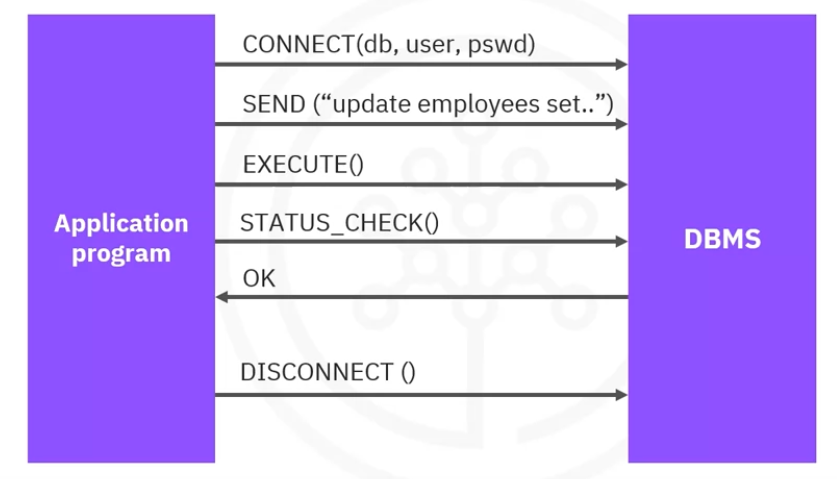

# **DB API**

**DB API is python's standard API for <span style="color:red">accessing relational databases.</span> It allows a single program to work with <span style="color:red">multiple</span> relational databases.**

### **Advantages**

- **Easy to implement and understand**

- **DB API is portable across databases**

- **Broad range of database connectivity from python**

# **Concepts of the python DB API**

### **Connection objects**

**Used For :**

- **Database Connection**

- **Manage Transaction**


### **Cursor Objects**

**Used For:**

- **Running Queries**

- **Fetching Result Sets**

### **Connection Methods**

- **.cursor()  : Returns a new cursor method with existing connection.**

- **.commit()  : Commit method will commit pending transaction.**

- **.rollback()  : will rollback to begining of existing transaction.**

- **.close()  : will close a database connection.**

### **Cursor Methods**

**Below methods used to manage content of fetch operation. Cursors created by same connection are not isolated change with one cursor will reflect in another cursor.**

- **.callproc()**

- **.execute()**

- **.executemany()**

- **.fetchone()**

- **.fetchmany()**

- **.fetchall()**

- **.nextset()**

- **arraysize()**

- **.close()**

# **Create & Access SQLite database using Python**

### **Create database using SQLite.**

In [26]:
import sqlite3

In [32]:
conn=sqlite3.connect('test.db')

In [33]:
cur_obj=conn.cursor()

### **Create a table in the database.**

In [39]:
cur_obj.execute('drop table if exists Address')

In [40]:
tbl='''CREATE TABLE IF NOT EXISTS Address (
    id INTEGER PRIMARY KEY NOT NULL,
    fname VARCHAR(30),
    lname VARCHAR(20),
    city VARCHAR(20),
    citycode CHAR(2)
);'''
    
cur_obj.execute(tbl)

### **Insert data into the table.**

In [56]:
cur_obj.execute("""
INSERT INTO Address VALUES 
(1,'John', 'Doe', 'Mumbai', 'MH'),
(2,'Jane', 'Smith', 'Delhi', 'DL'),
(3,'Amit', 'Patel', 'Ahmedabad', 'GJ'),
(4,'Priya', 'Sharma', 'Bangalore', 'KA'),
(5,'Rahul', 'Gupta', 'Kolkata', 'WB'),
(6,'Neha', 'Singh', 'Chennai', 'TN'),
(7,'Raj', 'Kumar', 'Hyderabad', 'TS'),
(8,'Pooja', 'Yadav', 'Pune', 'MH'),
(9,'Ravi', 'Verma', 'Jaipur', 'RJ'),
(10,'Anita', 'Das', 'Lucknow', 'UP')
""")

### **Query data in the table.**

In [58]:
statement='''select * from Address'''

cur_obj.execute(statement)

cur_obj.fetchall() # To Fetch all data

[(1, 'John', 'Doe', 'Mumbai', 'MH'),
 (2, 'Jane', 'Smith', 'Delhi', 'DL'),
 (3, 'Amit', 'Patel', 'Ahmedabad', 'GJ'),
 (4, 'Priya', 'Sharma', 'Bangalore', 'KA'),
 (5, 'Rahul', 'Gupta', 'Kolkata', 'WB'),
 (6, 'Neha', 'Singh', 'Chennai', 'TN'),
 (7, 'Raj', 'Kumar', 'Hyderabad', 'TS'),
 (8, 'Pooja', 'Yadav', 'Pune', 'MH'),
 (9, 'Ravi', 'Verma', 'Jaipur', 'RJ'),
 (10, 'Anita', 'Das', 'Lucknow', 'UP')]

In [60]:
statement='''select * from Address'''

cur_obj.execute(statement)

cur_obj.fetchmany(2) # to fetch required number of data.

[(1, 'John', 'Doe', 'Mumbai', 'MH'), (2, 'Jane', 'Smith', 'Delhi', 'DL')]

### **Update Query.**

In [61]:
update_query='update address set fname="anitta" where id=10'
cur_obj.execute(update_query)

In [62]:
cur_obj.execute('select * from address where id=10').fetchall()

[(10, 'anitta', 'Das', 'Lucknow', 'UP')]

### **Retrieve data into Pandas.**

In [63]:
import pandas as pd

df=pd.read_sql_query('select * from address;',con=conn)

In [64]:
df

,id,fname,lname,city,citycode
0,1,John,Doe,Mumbai,MH
1,2,Jane,Smith,Delhi,DL
2,3,Amit,Patel,Ahmedabad,GJ
3,4,Priya,Sharma,Bangalore,KA
4,5,Rahul,Gupta,Kolkata,WB
5,6,Neha,Singh,Chennai,TN
6,7,Raj,Kumar,Hyderabad,TS
7,8,Pooja,Yadav,Pune,MH
8,9,Ravi,Verma,Jaipur,RJ
9,10,anitta,Das,Lucknow,UP


### **Close Connection.**

In [65]:
conn.close()